# Procesamiento de Información 2023
## Unidad 2 - Tarea 2C (Corrección)
### David Aarón Ramírez Olmeda

### Introducción

la entropía se puede entender como una medida de incertidumbre o desorden en un sistema de símbolos, donde los símbolos menos probables aportan más información que los símbolos más frecuentes. Por lo tanto, eliminar los símbolos más comunes y redundantes puede ayudar a reducir la entropía del sistema, lo que a su vez puede llevar a una mayor eficiencia en la transmisión, almacenamiento y compresión de la información.

Cabe señalar que la entropía también se relaciona con la cantidad de opciones o alternativas posibles que existen en un sistema, y que puede ser calculada matemáticamente a partir de la probabilidad de ocurrencia de cada símbolo en el sistema. En resumen, la entropía es una medida importante en la teoría de la información y tiene aplicaciones en diversos campos, desde la ingeniería hasta la física y la biología.

Apoyados de los conocimientos adquiridos durante el curso y también, un poco, por las soluciones propuestas, damos inicio a nuestro experimento.

### Experimento

Se presenta un programa que realiza el procesamiento de texto y calcula la entropía a nivel de caracteres y palabras. El objetivo del programa es analizar la distribución de frecuencias de los caracteres y palabras en un conjunto de archivos de texto y calcular la entropía correspondiente.

Para calcular la entropía de un archivo de texto siguiendo los siguientes pasos, a grandes rasgos:

1. Leer el archivo de texto y almacenar su contenido en una variable.
2. Calcular la frecuencia de ocurrencia de cada símbolo (carácter) en el texto.
3. Calcular la probabilidad de cada símbolo dividiendo su frecuencia por el número total de símbolos en el texto.
4. Calcular la entropía a partir de la fórmula de la entropía de Shannon: $H = - sum(p * log_{2}(p))$, donde $p$ es la probabilidad de cada símbolo.

In [1]:
import unicodedata
from collections import Counter
import pandas as pd
import math
from matplotlib import pyplot as plt
from matplotlib import style
from nltk.corpus import stopwords
from IPython.display import display, Markdown
import re
import unicodedata
_SYMBOLS = set(";:,.\\-\"'/()[]¿?¡!{}~<>|«»-—’\t\n\r")
_STOPWORDS = stopwords.words("spanish")

### Preprocesamiento

En esta parte se definen funciones para normalizar el texto, filtrar palabras y aplicar funciones de procesamiento en general. Estas funciones se utilizan posteriormente en la sección "Procesamiento" para realizar el procesamiento de los archivos de texto.

In [2]:
import re
import unicodedata

def normalize_text(text, punct=False, accents=False, max_dup=2):
    n_str = []
    c_prev = ''
    cc_prev = 0
    text = unicodedata.normalize('NFKC', text)
    words = re.findall(r'\b\w+\b', text)
    for word in words:
        for c in word:
            if not punct:
                if c in _SYMBOLS:
                    continue
            if not accents and unicodedata.combining(c):
                continue
            if c_prev == c:
                cc_prev += 1
                if cc_prev >= max_dup:
                    continue
            else:
                cc_prev = 0
            n_str.append(c)
            c_prev = c
        n_str.append(' ')
        c_prev = ' '
    return "".join(n_str[:-1])

# Define las palabras de detención normalizadas
_STOPWORDS = stopwords.words("spanish")
_NORM_STOPWORDS = [normalize_text(sw) for sw in _STOPWORDS]

# Filtra las palabras y remueve las palabras de detención y los enlaces
def filter_words(text, remove_stopwords=True):
    wlist = text.split()
    o_text = []
    for t in wlist:
        if t.startswith("http") or t.startswith("@") or t.startswith("#"):
            continue
        if remove_stopwords and t in _NORM_STOPWORDS:
            continue
        if t.isnumeric():
            continue
        o_text.append(t)
    return " ".join(o_text)

In [3]:
# Estandariza el texto, remueve símbolos duplicados, acentos y puntuación
def normalize_text(text, punct=False, accents=False, max_dup=2):
    n_str = []
    c_prev = ''
    cc_prev = 0
    for c in text:
        if not punct:                
            if c in _SYMBOLS:
                continue
        if not accents and unicodedata.combining(c):
            continue
        if c_prev == c:
            cc_prev += 1
            if cc_prev >= max_dup:
                continue
        else:
            cc_prev = 0
        n_str.append(c)
        c_prev = c
    return unicodedata.normalize('NFKC', "".join(n_str))

In [4]:
# Filtra los tokens que inician con los símbolos indicados, además de datos numéricos
def filter_words(text, remove_stopwords=True):
    wlist = text.split()
    o_text = []
    for t in wlist:
        if t.startswith("http") or t.startswith("@") or t.startswith("#"):
            continue
        if remove_stopwords and t in _NORM_STOPWORDS:
            continue
        if t.isnumeric():
            continue
        o_text.append(t)
    return " ".join(o_text)

In [5]:
# Aplicar funciones de procesamiento
def preprocessing(text, remove_stopwords=True):
	text = text.lower()
	text = normalize_text(text, punct=False, accents=False)
	text = filter_words(text, remove_stopwords=remove_stopwords)
	return text

### Procesamiento

Aquí se definen funciones para obtener los q-gramas de una palabra, contar las frecuencias de unigramas a nivel de caracteres y palabras, y calcular la entropía. Estas funciones se aplican a los archivos de texto proporcionados en el ejercicio, tanto a nivel de caracteres como a nivel de palabras.

In [6]:
# Obtiene una lista de qgramas basado en los caracteres de 'word'
def qgrams(word, size):
    sep = ""
    output = []
    wlist = [c  for c in word]
    n = len(wlist)
    if (n - size + 1) <= 0:
        return []
    for start in range(n - size + 1):
        t = sep.join(wlist[start:start+size])
        output.append(t)
    return output

In [7]:
# Cuenta las frecuencias de unigramas a nivel de caracter del archivo
def FrequencyDist_Char(file_name):
    with open(file_name, "r") as archivo:
        contenido = archivo.read()
        contenido = contenido.replace('\n', ' ')
    uni_counts = Counter()
    contenido = preprocessing(contenido)
    contenido = contenido.split()     
        # contar unigrams de caracteres
    for w in contenido:
        for q in qgrams(w, size=1):
            uni_counts[q] += 1    
    return uni_counts

In [8]:
# Cuenta las frecuencias de unigramas del archivo a nivel de palabras
def FrequencyDist(file_name, remove_stopwords=True):
    with open(file_name, "r") as archivo:
        contenido = archivo.read()
        contenido = contenido.replace('\n', ' ')
    uni_counts = Counter()
    #for text in contenido:
    contenido = preprocessing(contenido, remove_stopwords=remove_stopwords)
    contenido = contenido.split()     
        # contar unigrams
    for w in contenido:
        uni_counts[w] += 1    
    return uni_counts

In [9]:
# Cálcula la entropía con base en los datos proporcionados en data
def entropy(data):
    N = sum(data.values())
    H = 0
    for b, v in data.items():
        H += data[b]/N * math.log2(data[b]/N)
    return -H

### Ejercicio

Se ejecuta el código utilizando los archivos de texto mencionados. Se muestra la entropía calculada a nivel de caracteres y palabras, tanto con stopwords como sin stopwords, para cada archivo de texto.

Entropía a nivel de caracter: text_1.txt
Entropía: 3.1057411376611377

Entropía a nivel de caracter: text_2.txt
Entropía: 3.113216813728976

Entropía a nivel de caracter: text_3.txt
Entropía: 3.259511437981394

Entropía a nivel de caracter: text_4.txt
Entropía: 3.154173423441847

Entropía a nivel de caracter: text_5.txt
Entropía: 3.19914765068374



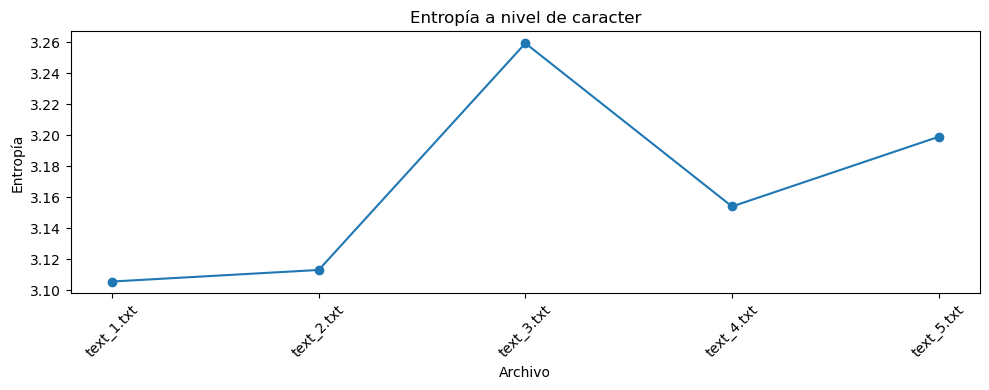

In [10]:
# Ejemplo de ejecución a nivel de caracteres

entropy_char = []
file_names_char = []

for k in range(1, 6):
    file_name = "text_{}.txt".format(k)
    print("=" * 50)
    print("Entropía a nivel de caracter: {}".format(file_name))
    unigrams = FrequencyDist_Char(file_name)
    entropy_val = entropy(unigrams)
    entropy_char.append(entropy_val)
    file_names_char.append(file_name)
    print("Entropía: {}".format(entropy_val))
    print()

plt.figure(figsize=(10, 4))
plt.plot(file_names_char, entropy_char, marker='o')
plt.xlabel("Archivo")
plt.ylabel("Entropía")
plt.title("Entropía a nivel de caracter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Entropía a nivel de palabras con stopwords: libro_1.txt
Entropía: 9.313720626147601

Entropía a nivel de palabras con stopwords: libro_2.txt
Entropía: 9.686649655413543

Entropía a nivel de palabras sin stopwords: libro_1.txt
Entropía: 11.28907348315581

Entropía a nivel de palabras sin stopwords: libro_2.txt
Entropía: 11.730535257774413



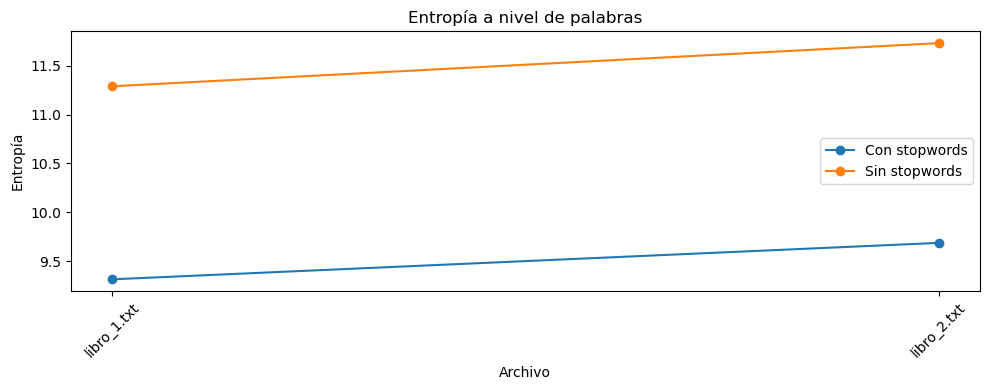

In [11]:
entropy_with_stopwords = []
entropy_without_stopwords = []
file_names_words = []

for k in range(1, 3):
    file_name = "libro_{}.txt".format(k)
    print("=" * 50)
    print("Entropía a nivel de palabras con stopwords: {}".format(file_name))
    unigrams = FrequencyDist(file_name, remove_stopwords=False)
    entropy_val = entropy(unigrams)
    entropy_with_stopwords.append(entropy_val)
    file_names_words.append(file_name)
    print("Entropía: {}".format(entropy_val))
    print()

for k in range(1, 3):
    file_name = "libro_{}.txt".format(k)
    print("=" * 50)
    print("Entropía a nivel de palabras sin stopwords: {}".format(file_name))
    unigrams = FrequencyDist(file_name, remove_stopwords=True)
    entropy_val = entropy(unigrams)
    entropy_without_stopwords.append(entropy_val)
    print("Entropía: {}".format(entropy_val))
    print()

plt.figure(figsize=(10, 4))
plt.plot(file_names_words, entropy_with_stopwords, marker='o', label='Con stopwords')
plt.plot(file_names_words, entropy_without_stopwords, marker='o', label='Sin stopwords')
plt.xlabel("Archivo")
plt.ylabel("Entropía")
plt.title("Entropía a nivel de palabras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

### Conclusión

En el caso de los archivos de texto analizados, se observa que la entropía a nivel de caracteres es relativamente baja, lo que indica una mayor predictibilidad en la distribución de los caracteres. Por otro lado, la entropía a nivel de palabras es mayor, lo que sugiere una mayor variedad y diversidad en la elección de palabras utilizadas en los textos.

La opción de eliminar las palabras de detención (stopwords) tiene un impacto en la entropía a nivel de palabras, reduciendo la variabilidad y aumentando la predictibilidad en la distribución de palabras

Esta es una herramienta útil para analizar la complejidad y diversidad de los archivos de texto, lo que puede ser aplicado en diferentes áreas como dentro del procesamiento de información.